# COVID in Germany

## Attempt 1, Landkreise, most recent data

In [1]:
%matplotlib inline
import os.path
import pandas as pd


Test with data from https://npgeo-corona-npgeo-de.hub.arcgis.com/ (see ../ideas.org for details)

In [2]:
datasource = "https://opendata.arcgis.com/datasets/917fc37a709542548cc3be077a786c17_0.csv"
filename = os.path.split(datasource)[1]
if os.path.exists(filename):
    print("Data downloaded already - delete file if you want a more recent copy")
    !ls -l $filename
else:
    !wget $datasource
    

Data downloaded already - delete file if you want a more recent copy
-rw-r--r--  1 fangohr  staff  135120 Apr  6 05:17 917fc37a709542548cc3be077a786c17_0.csv


In [3]:

df = pd.read_csv(filename)

In [4]:
df.describe()

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,IBZ,SN_L,SN_R,...,KFL,Shape__Area,Shape__Length,death_rate,cases,deaths,cases_per_100k,cases_per_population,BL_ID,cases7_per_100k
count,412.000000,400.0,400.0,400.0,412.000000,400.00000,4.000000e+02,400.000000,400.000000,400.000000,...,400.000000,4.120000e+02,4.120000e+02,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,206.771845,4.0,4.0,1.0,8378.065534,8299.21250,8.298040e+10,42.142500,7.972500,2.780000,...,891.726750,8.669283e+08,2.107930e+05,1.321177,231.531553,3.480583,114.405455,0.114405,8.060680,42.180255
std,119.468700,0.0,0.0,0.0,3737.193823,3764.65843,3.764834e+10,1.298618,3.805647,2.397074,...,725.202263,7.260308e+08,1.223917e+05,1.444909,303.675732,5.739869,95.046034,0.095046,3.784166,41.678507
min,1.000000,4.0,4.0,1.0,1001.000000,1001.00000,1.001000e+10,40.000000,1.000000,0.000000,...,35.700000,2.042866e+07,3.079684e+04,0.000000,7.000000,0.000000,11.014429,0.011014,1.000000,0.000000
25%,103.750000,4.0,4.0,1.0,5773.000000,5761.00000,5.761002e+10,41.000000,5.000000,1.000000,...,278.010000,2.240654e+08,1.057747e+05,0.000000,77.000000,0.000000,58.281649,0.058282,5.000000,18.192460
50%,206.500000,4.0,4.0,1.0,8316.500000,8233.00000,8.231000e+10,43.000000,8.000000,3.000000,...,797.425000,7.782234e+08,2.127397e+05,1.043481,150.500000,2.000000,92.948826,0.092949,8.000000,30.146688
75%,309.250000,4.0,4.0,1.0,9771.250000,9675.25000,9.673262e+10,43.000000,9.000000,4.000000,...,1264.152500,1.248695e+09,2.862319e+05,1.925399,271.000000,4.000000,138.890270,0.138890,9.000000,54.000143
max,415.000000,4.0,4.0,1.0,16077.000000,16077.00000,1.607700e+11,46.000000,16.000000,9.000000,...,5495.610000,5.500547e+09,1.130009e+06,12.669683,3500.000000,43.000000,1044.080327,1.044080,16.000000,468.939645


Shows all the 'Landkreise'

In [5]:
df['county']

0                            SK Flensburg
1                                 SK Kiel
2                               SK Lübeck
3                           SK Neumünster
4                         LK Dithmarschen
                      ...                
407                     SK Berlin Spandau
408         SK Berlin Steglitz-Zehlendorf
409                       SK Berlin Mitte
410    SK Berlin Friedrichshain-Kreuzberg
411        SK Berlin Tempelhof-Schöneberg
Name: county, Length: 412, dtype: object

In [6]:
pd.set_option('display.max_columns', None)
df[df['county']=="LK Pinneberg"]

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,NBD,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,Shape__Area,Shape__Length,death_rate,cases,deaths,cases_per_100k,cases_per_population,BL,BL_ID,county,last_update,cases7_per_100k
8,9,4.0,4.0,1.0,1056,1056.0,1.056004e+10,Pinneberg,Kreis,42.0,--,ja,1.0,0.0,56.0,0.0,0.0,0.0,R,DEF09,1.056000e+10,1056000.0,2009/01/01 00:00:00.000,314391,664.27,DEBKGDL20000E44B,6.367902e+08,185849.136734,0.900901,333,3,105.919063,0.105919,Schleswig-Holstein,1,LK Pinneberg,"06.04.2020, 00:00 Uhr",38.805182


but only for one point in time

In [7]:
df['last_update'].describe()

count                       412
unique                        1
top       06.04.2020, 00:00 Uhr
freq                        412
Name: last_update, dtype: object

In [8]:
df.head()

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,NBD,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,Shape__Area,Shape__Length,death_rate,cases,deaths,cases_per_100k,cases_per_population,BL,BL_ID,county,last_update,cases7_per_100k
0,1,4.0,4.0,1.0,1001,1001.0,1.001000e+10,Flensburg,Kreisfreie Stadt,40.0,--,ja,1.0,0.0,1.0,0.0,0.0,0.0,R,DEF01,1.001000e+10,1001000.0,2008/01/01 00:00:00.000,89504,56.73,DEBKGDL20000002R,4.918293e+07,42752.592015,3.571429,28,1,31.283518,0.031284,Schleswig-Holstein,1,SK Flensburg,"06.04.2020, 00:00 Uhr",6.703611
1,2,4.0,4.0,1.0,1002,1002.0,1.002000e+10,Kiel,Kreisfreie Stadt,40.0,--,ja,1.0,0.0,2.0,0.0,0.0,0.0,R,DEF02,1.002000e+10,1002000.0,2006/01/01 00:00:00.000,247548,118.65,DEBKGDL20000E43X,1.122314e+08,104373.457289,0.609756,164,1,66.249778,0.066250,Schleswig-Holstein,1,SK Kiel,"06.04.2020, 00:00 Uhr",21.006027
2,3,4.0,4.0,1.0,1003,1003.0,1.003000e+10,Lübeck,Kreisfreie Stadt,40.0,--,ja,1.0,0.0,3.0,0.0,0.0,0.0,R,DEF03,1.003000e+10,1003000.0,2006/02/01 00:00:00.000,217198,214.19,DEBKGDL20000DYM9,2.116771e+08,146459.457897,0.990099,101,1,46.501349,0.046501,Schleswig-Holstein,1,SK Lübeck,"06.04.2020, 00:00 Uhr",7.826960
3,4,4.0,4.0,1.0,1004,1004.0,1.004000e+10,Neumünster,Kreisfreie Stadt,40.0,--,ja,1.0,0.0,4.0,0.0,0.0,0.0,R,DEF04,1.004000e+10,1004000.0,1970/04/26 00:00:00.000,79487,71.66,DEBKGDL20000E4KX,7.140224e+07,54863.995416,0.000000,32,0,40.258155,0.040258,Schleswig-Holstein,1,SK Neumünster,"06.04.2020, 00:00 Uhr",21.387145
4,5,4.0,4.0,1.0,1051,1051.0,1.051004e+10,Dithmarschen,Kreis,42.0,--,ja,1.0,0.0,51.0,0.0,0.0,0.0,R,DEF05,1.051000e+10,1051000.0,2011/08/01 00:00:00.000,133210,1428.18,DEBKGDL20000E14G,1.425511e+09,250768.570200,2.500000,40,1,30.027776,0.030028,Schleswig-Holstein,1,LK Dithmarschen,"06.04.2020, 00:00 Uhr",12.761805


In [9]:
df[df['GEN']=="Hamburg"]

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,NBD,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,Shape__Area,Shape__Length,death_rate,cases,deaths,cases_per_100k,cases_per_population,BL,BL_ID,county,last_update,cases7_per_100k
15,16,4.0,4.0,1.0,2000,2000.0,2.000000e+10,Hamburg,Kreisfreie Stadt,40.0,--,ja,2.0,0.0,0.0,0.0,0.0,0.0,R,DE600,2.000000e+10,2000000.0,1974/01/01 00:00:00.000,1841179,755.09,DEBKGDL20000E6GN,7.420817e+08,234529.147982,0.634815,2993,19,162.558882,0.162559,Hamburg,2,SK Hamburg,"06.04.2020, 00:00 Uhr",42.092594


# Attempt 2, more time data

In [16]:

datasource = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"

filename = os.path.split(datasource)[1]
if os.path.exists(filename):
    print("Data downloaded already - delete file if you want a more recent copy")
    !ls -l $filename
else:
    !wget $datasource

--2020-04-06 08:36:00--  https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.206.202.196, 3.227.92.20, 52.4.166.121
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.206.202.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘dd4580c810204019a7b8eb3e0b329dd6_0.csv’

dd4580c810204019a7b     [           <=>      ]   4.02M   310KB/s    in 14s     

2020-04-06 08:36:14 (302 KB/s) - ‘dd4580c810204019a7b8eb3e0b329dd6_0.csv’ saved [4219128]



In [17]:
df = pd.read_csv(filename)

In [18]:
df.describe()

,IdBundesland,AnzahlFall,AnzahlTodesfall,ObjectId,IdLandkreis,NeuerFall,NeuerTodesfall
count,37766.000000,37766.000000,37766.000000,37766.00000,37766.000000,37766.000000,37766.000000
mean,7.702590,2.524731,0.037838,829114.50000,8029.773182,0.047344,-8.691680
std,3.192718,3.140947,0.217525,10902.24947,3172.102593,0.216819,1.644202
min,1.000000,-3.000000,-2.000000,810232.00000,1001.000000,-1.000000,-9.000000
25%,5.000000,1.000000,0.000000,819673.25000,5766.000000,0.000000,-9.000000
50%,8.000000,1.000000,0.000000,829114.50000,8235.000000,0.000000,-9.000000
75%,9.000000,3.000000,0.000000,838555.75000,9561.000000,0.000000,-9.000000
max,16.000000,68.000000,7.000000,847997.00000,16077.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37766 entries, 0 to 37765
Data columns (total 13 columns):
IdBundesland       37766 non-null int64
Bundesland         37766 non-null object
Landkreis          37766 non-null object
Altersgruppe       37766 non-null object
Geschlecht         37766 non-null object
AnzahlFall         37766 non-null int64
AnzahlTodesfall    37766 non-null int64
ObjectId           37766 non-null int64
Meldedatum         37766 non-null object
IdLandkreis        37766 non-null int64
Datenstand         37766 non-null object
NeuerFall          37766 non-null int64
NeuerTodesfall     37766 non-null int64
dtypes: int64(7), object(6)
memory usage: 3.7+ MB


`Altersgruppe` is the age group.

In [20]:
df.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,810232,2020-03-14T00:00:00.000Z,1001,"06.04.2020, 00:00 Uhr",0,-9
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,2,0,810233,2020-03-19T00:00:00.000Z,1001,"06.04.2020, 00:00 Uhr",0,-9
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,810234,2020-03-21T00:00:00.000Z,1001,"06.04.2020, 00:00 Uhr",0,-9
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,810235,2020-03-27T00:00:00.000Z,1001,"06.04.2020, 00:00 Uhr",0,-9
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,810236,2020-04-04T00:00:00.000Z,1001,"06.04.2020, 00:00 Uhr",0,-9


In [21]:
df.sum()

IdBundesland                                                  290896
Bundesland         Schleswig-HolsteinSchleswig-HolsteinSchleswig-...
Landkreis          SK FlensburgSK FlensburgSK FlensburgSK Flensbu...
Altersgruppe       A15-A34A15-A34A15-A34A15-A34A15-A34A15-A34A15-...
Geschlecht         MMMMMWWWMMWWWWWWMMWWMWMMMMMMMMMMMMMMMMMMWWWWWW...
AnzahlFall                                                     95349
AnzahlTodesfall                                                 1429
ObjectId                                                 31312338207
Meldedatum         2020-03-14T00:00:00.000Z2020-03-19T00:00:00.00...
IdLandkreis                                                303252414
Datenstand         06.04.2020, 00:00 Uhr06.04.2020, 00:00 Uhr06.0...
NeuerFall                                                       1788
NeuerTodesfall                                               -328250
dtype: object

- `AnzahlFall` looks like the total number of cases (on. dashboard: 57298)
- `AnzahlTodesfall` is the total number of deaths (on dasbboald: 455)

In [22]:
pinneberg = df[df["Landkreis"]=="LK Pinneberg"]

In [23]:
pinneberg.sort_values(by="Meldedatum")

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
463,1,Schleswig-Holstein,LK Pinneberg,A35-A59,M,1,0,810695,2020-03-03T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
523,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,810755,2020-03-06T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
443,1,Schleswig-Holstein,LK Pinneberg,A15-A34,W,1,0,810675,2020-03-09T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
524,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,810756,2020-03-10T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
525,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,810757,2020-03-11T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1,Schleswig-Holstein,LK Pinneberg,A35-A59,M,1,0,810720,2020-04-04T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
554,1,Schleswig-Holstein,LK Pinneberg,A80+,M,2,0,810786,2020-04-04T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",0,-9
510,1,Schleswig-Holstein,LK Pinneberg,A35-A59,W,1,0,810742,2020-04-05T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",1,-9
542,1,Schleswig-Holstein,LK Pinneberg,A60-A79,W,1,0,810774,2020-04-05T00:00:00.000Z,1056,"06.04.2020, 00:00 Uhr",1,-9


In [24]:
hamburg = df[df["Bundesland"]=="Hamburg"].sort_values(by="Meldedatum")

In [25]:
hamburg

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
6213,2,Hamburg,SK Hamburg,A35-A59,W,1,0,811445,2020-02-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6287,2,Hamburg,SK Hamburg,A60-A79,W,1,0,811519,2020-03-01T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6248,2,Hamburg,SK Hamburg,A60-A79,M,1,0,811480,2020-03-03T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6214,2,Hamburg,SK Hamburg,A35-A59,W,2,0,811446,2020-03-04T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6171,2,Hamburg,SK Hamburg,A35-A59,M,1,0,811403,2020-03-04T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,2,Hamburg,SK Hamburg,A60-A79,W,4,0,811548,2020-04-05T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",1,-9
6134,2,Hamburg,SK Hamburg,A15-A34,M,1,0,811366,2020-04-05T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",1,-9
6247,2,Hamburg,SK Hamburg,A35-A59,W,6,0,811479,2020-04-05T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",1,-9
6282,2,Hamburg,SK Hamburg,A60-A79,M,2,0,811514,2020-04-05T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",1,-9


In [26]:
hamburg[hamburg["Meldedatum"]=="2020-03-29T00:00:00.000Z"]

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
6309,2,Hamburg,SK Hamburg,A60-A79,W,7,0,811541,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6126,2,Hamburg,SK Hamburg,A15-A34,M,16,0,811358,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6273,2,Hamburg,SK Hamburg,A60-A79,M,9,0,811505,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6196,2,Hamburg,SK Hamburg,A35-A59,M,33,0,811428,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6333,2,Hamburg,SK Hamburg,A80+,M,2,0,811565,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6077,2,Hamburg,SK Hamburg,A05-A14,M,2,0,811309,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6352,2,Hamburg,SK Hamburg,A80+,W,3,0,811584,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6238,2,Hamburg,SK Hamburg,A35-A59,W,22,0,811470,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9
6161,2,Hamburg,SK Hamburg,A15-A34,W,15,0,811393,2020-03-29T00:00:00.000Z,2000,"06.04.2020, 00:00 Uhr",0,-9


In [27]:
hamburg.sum()

IdBundesland                                                     656
Bundesland         HamburgHamburgHamburgHamburgHamburgHamburgHamb...
Landkreis          SK HamburgSK HamburgSK HamburgSK HamburgSK Ham...
Altersgruppe       A35-A59A60-A79A60-A79A35-A59A35-A59A15-A34A35-...
Geschlecht         WWMWMWMWWWMMWMMMWWMWWMMMWMMMMMWWMWWMMWWMWMMMMW...
AnzahlFall                                                      2992
AnzahlTodesfall                                                   19
ObjectId                                                   266150516
Meldedatum         2020-02-29T00:00:00.000Z2020-03-01T00:00:00.00...
IdLandkreis                                                   656000
Datenstand         06.04.2020, 00:00 Uhr06.04.2020, 00:00 Uhr06.0...
NeuerFall                                                         17
NeuerTodesfall                                                 -2799
dtype: object

Okay, that looks like it is working.

In [28]:
df.columns

Index(['IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht',
       'AnzahlFall', 'AnzahlTodesfall', 'ObjectId', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall'],
      dtype='object')

In [29]:
tmp = df[["Bundesland", "Landkreis"]].drop_duplicates()

In [25]:
tmp.to_html("Landkreise.html")

In [26]:
pinneberg = df[df["Landkreis"] == "LK Pinneberg"]

In [27]:
import matplotlib.pyplot as plt

In [28]:
pinneberg.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
502,1,Schleswig-Holstein,LK Pinneberg,A80+,W,2,0,670655,2020-04-02T00:00:00.000Z,1056,"03.04.2020, 00:00 Uhr",1,-9
503,1,Schleswig-Holstein,LK Pinneberg,unbekannt,M,1,0,670656,2020-03-24T00:00:00.000Z,1056,"03.04.2020, 00:00 Uhr",0,-9
504,1,Schleswig-Holstein,LK Pinneberg,unbekannt,M,1,0,670657,2020-03-29T00:00:00.000Z,1056,"03.04.2020, 00:00 Uhr",0,-9
505,1,Schleswig-Holstein,LK Pinneberg,unbekannt,W,1,0,670658,2020-03-27T00:00:00.000Z,1056,"03.04.2020, 00:00 Uhr",0,-9
506,1,Schleswig-Holstein,LK Pinneberg,unbekannt,W,1,0,670659,2020-03-31T00:00:00.000Z,1056,"03.04.2020, 00:00 Uhr",0,-9


In [29]:
tmp = pinneberg[["AnzahlFall", "AnzahlTodesfall", "Meldedatum"]]

/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


,AnzahlFall,AnzahlTodesfall,Meldedatum
Meldedatum,,,
2020-03-16 00:00:00+00:00,1,0,2020-03-16T00:00:00.000Z
2020-03-28 00:00:00+00:00,1,0,2020-03-28T00:00:00.000Z
2020-03-30 00:00:00+00:00,1,0,2020-03-30T00:00:00.000Z
2020-03-13 00:00:00+00:00,1,0,2020-03-13T00:00:00.000Z
2020-03-28 00:00:00+00:00,1,0,2020-03-28T00:00:00.000Z


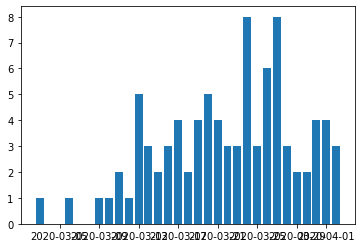

In [30]:
tmp.index = pd.to_datetime(tmp['Meldedatum'])
plt.bar(tmp.index, tmp['AnzahlFall'].values)
tmp.head()

/Users/fangohr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AnzahlFall,AnzahlTodesfall,Meldedatum
Meldedatum,,,
2020-03-03 00:00:00+00:00,1,0,2020-03-03T00:00:00.000Z
2020-03-06 00:00:00+00:00,1,0,2020-03-06T00:00:00.000Z
2020-03-09 00:00:00+00:00,1,0,2020-03-09T00:00:00.000Z
2020-03-10 00:00:00+00:00,1,0,2020-03-10T00:00:00.000Z
2020-03-11 00:00:00+00:00,1,0,2020-03-11T00:00:00.000Z


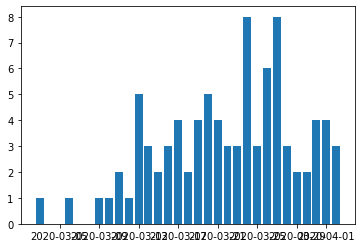

In [31]:
tmp.sort_index(inplace=True)
plt.bar(tmp.index, tmp['AnzahlFall'].values)
tmp.head()

In [32]:
cases = tmp["AnzahlFall"].cumsum()
deaths = tmp["AnzahlTodesfall"].cumsum()

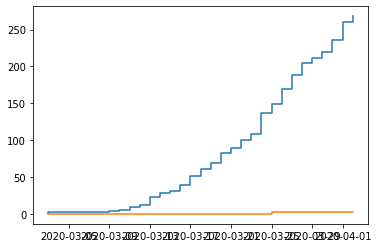

In [33]:
import matplotlib.pyplot as plt
plt.step(cases.index, cases.values, label='cases')
plt.step(deaths.index, deaths.values, label='deaths')

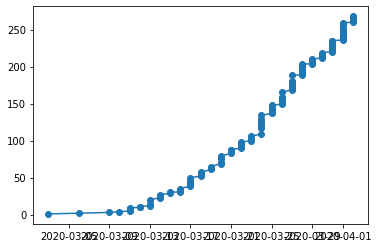

In [34]:
plt.plot(cases.index, cases.values, 'o-')

In [35]:
def fetch_data_germany():
    datasource = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"
    filename = os.path.split(datasource)[1]
    if os.path.exists(filename):
        print("Data downloaded already - delete file if you want a more recent copy")
        !ls -l $filename
    else:
        !wget $datasource

    germany = pd.read_csv(filename)    
    # create new column (lowercase 'landkreis')
    germany['landkreis'] = germany['Landkreis'].apply(lambda s: s[3:])  # get rid of SK, LK
    return germany

In [36]:
def germany_select_region(state=None, landkreis=None):
    germany = fetch_data_germany()
    """Returns two time series: (cases, deaths)"""
    assert state or landkreis, "Need to provide a value for state or landkreis"
    
    if state and landkreis:
        raise NotImplementedError
        """We need to check if this is important."""
    
    if state:
        assert state in germany['Bundesland'].values, \
            f"{state} not in available German states. These are {sorted(germany['Bundesland'].drop_duplicates())}"
        
        raise NotImplementedError
        
    if landkreis:    
        assert landkreis in germany['landkreis'].values, \
            f"{state} not in available German states. These are {sorted(germany['landkreis'].drop_duplicates())}"
    
        lk = germany[germany["landkreis"] == landkreis]
        lk.index = pd.to_datetime(lk['Meldedatum'])
        lk.index.name = 'date'
        lk = lk.sort_index()
        
        cases = lk["AnzahlFall"].groupby('date').agg('sum').cumsum()
        cases.country = 'Germany-{landkreis.capitalize()}'
        cases.label = 'cases'

        deaths = lk["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
        deaths.country = 'Germany-{landkreis.capitalize()}'
        deaths.label = 'deaths'
  
        return cases, deaths
        
c, d = germany_select_region(landkreis="Hamburg")

Data downloaded already - delete file if you want a more recent copy
-rw-r--r--  1 fangohr  staff  3628275 Apr  3 06:39 dd4580c810204019a7b8eb3e0b329dd6_0.csv


In [37]:
c2 = c.groupby('date').agg('sum')

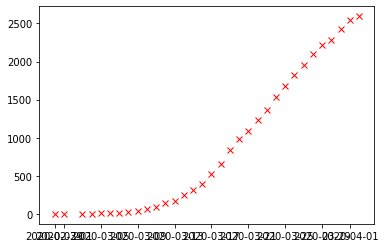

In [38]:
plt.plot(c.index, c.values, 'xr')

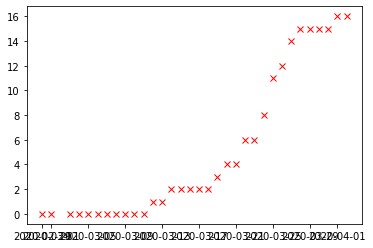

In [39]:
plt.plot(d.index, d.values, 'xr')

In [40]:
c.shape

(33,)

In [41]:
c.groupby('date').agg('sum')

date
2020-02-29 00:00:00+00:00       1
2020-03-01 00:00:00+00:00       2
2020-03-03 00:00:00+00:00       3
2020-03-04 00:00:00+00:00       6
2020-03-05 00:00:00+00:00      11
2020-03-06 00:00:00+00:00      13
2020-03-07 00:00:00+00:00      16
2020-03-08 00:00:00+00:00      21
2020-03-09 00:00:00+00:00      41
2020-03-10 00:00:00+00:00      67
2020-03-11 00:00:00+00:00      96
2020-03-12 00:00:00+00:00     138
2020-03-13 00:00:00+00:00     171
2020-03-14 00:00:00+00:00     246
2020-03-15 00:00:00+00:00     319
2020-03-16 00:00:00+00:00     391
2020-03-17 00:00:00+00:00     522
2020-03-18 00:00:00+00:00     650
2020-03-19 00:00:00+00:00     844
2020-03-20 00:00:00+00:00     979
2020-03-21 00:00:00+00:00    1090
2020-03-22 00:00:00+00:00    1233
2020-03-23 00:00:00+00:00    1362
2020-03-24 00:00:00+00:00    1537
2020-03-25 00:00:00+00:00    1676
2020-03-26 00:00:00+00:00    1821
2020-03-27 00:00:00+00:00    1960
2020-03-28 00:00:00+00:00    2103
2020-03-29 00:00:00+00:00    2212
2020-03-3